# **Project Name**    -  **Hotel Booking Analysis**

## ***1. Data Preparation***

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline

In [ ]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the Dataset from both the sheets
dir_path = ('/content/drive/MyDrive/Decathlon_Case_Study/customer_transactions_sample.xlsx')
df1 = pd.read_excel(dir_path, sheet_name = "Year 2009-2010")
df2 = pd.read_excel(dir_path, sheet_name = "Year 2010-2011")

# Concatenating both DataFrames
df = pd.concat([df1, df2], ignore_index = True)

## ***2. Data Quality and Key Observation***


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


* **Invoice                :**Invoice Number

* **Stockcode       :**Product Item Code

* **Description            :**Product Item Name

* **Quantity            :**The Quantity of Each Product Per Transaction

* **Invoice_Date           :**  Invoice Date And Time

* **Price        :**Product Price Per Unit in Sterling

* **Customer_ID             :**Customer Number

* **Country**         :Country Name

In [ ]:
Null_Values = df.isnull().sum()
Null_Columns = Null_Values.sort_values(ascending = False)
Null_Columns

Customer ID    243007
Description      4382
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [ ]:
df['Customer ID'].fillna(0,inplace=True)
df['Description'].fillna('Unknown', inplace=True)
df.loc[df['Description'] == '0', 'Description'] = 'Unknown'
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
# Replacing '?' with 'Unknown'
df.loc[df['Description'] == '?', 'Description'] = 'Unknown'

# Replacing '??' with 'Unknown'
df.loc[df['Description'] == '??', 'Description'] = 'Unknown'

# Replacing 'damages?' with 'Damages'
df.loc[df['Description'] == 'damages?', 'Description'] = 'Damages'

## ***3. Key Actionable Insights and Data Visualizations***

#### 3.1 How many cancellations has been made?

In [ ]:
# Quantity with negative values are most likely a returned product
Quantity_with_negative_values = df[df['Quantity'] < 0]
Quantity_with_negative_values.shape[0]

22950

#### 3.2 Cancellations based on Invoice Number.

In [ ]:
# 'C' in Invoice column indicates cancellation
# Calculating total number of Invoice starting with 'C'
Cancelled_Invoice = ((df['Invoice'].astype(str).str.startswith('C')) & (df['Quantity'] < 0)).sum()
print("Total Invoice Cancelled are", Cancelled_Invoice)

# Calculate the percentage of Total cancelled invoice
Percentage_Cancelled_Invoice = (Cancelled_Invoice/df.shape[0])*100
print(f"Percentage of Total Canceled Invoice: {Percentage_Cancelled_Invoice:.2f}%")

Total Invoice Cancelled are 19493
Percentage of Total Canceled Invoice: 1.83%


In [ ]:
# Calculating total number of invoice other than 'C' but has quantity less than 1
Non_Cancelled_Invoice = ((~df['Invoice'].astype(str).str.startswith('C')) & (df['Quantity'] < 0)).sum()
print("Total Non Cancelled Invoice are", Non_Cancelled_Invoice)

# Calculate the percentage of non cancelled invoice
Percentage_Non_Cancelled_Invoice = (Non_Cancelled_Invoice/df.shape[0])*100
print(f"Percentage of Non Cancelled Invoice: {Percentage_Non_Cancelled_Invoice:.2f}%")

Total Non Cancelled Invoice are 3457
Percentage of Non Cancelled Invoice: 0.32%


Total cancelled orders are 22950
Percentage of Total Cancellation: 2.15%


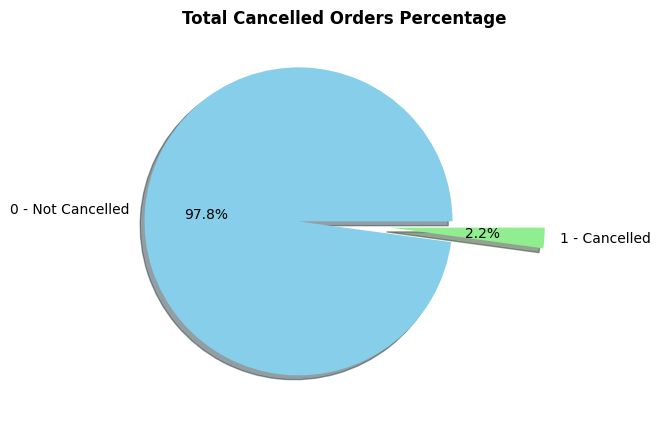

In [ ]:
# Total cancelled orders based on Quantity
Total_Cancelled_Orders = (df['Quantity'] < 0).sum()
print("Total cancelled orders are", Total_Cancelled_Orders)

# Calculate the percentage of total cancelled orders
Percentage_Total_Cancellation = (Total_Cancelled_Orders/df.shape[0]) * 100
print(f"Percentage of Total Cancellation: {Percentage_Total_Cancellation:.2f}%")

# Plotting a chart to visualize Total cancelled orders
plt.figure(figsize=(12, 5))

Labels = ['0 - Not Cancelled', '1 - Cancelled']

Cancelled_Orders = df[df['Quantity'] < 0]['Quantity'].count()
Not_Cancelled_Orders = df[df['Quantity'] >= 0]['Quantity'].count()

cancel_counts = [Not_Cancelled_Orders, Cancelled_Orders]

plt.pie(cancel_counts, labels=Labels, explode=[0.30, 0.30], autopct='%1.1f%%', startangle=0, shadow=True, colors=['skyblue', 'lightgreen'])
plt.title('Total Cancelled Orders Percentage', weight='bold')
plt.show()

##### As seen from the above diagram, it is clear that cancellation percentage is around 2.2%

#### 3.3 Comparison of Cancelled and Non_Cancelled Invoice.

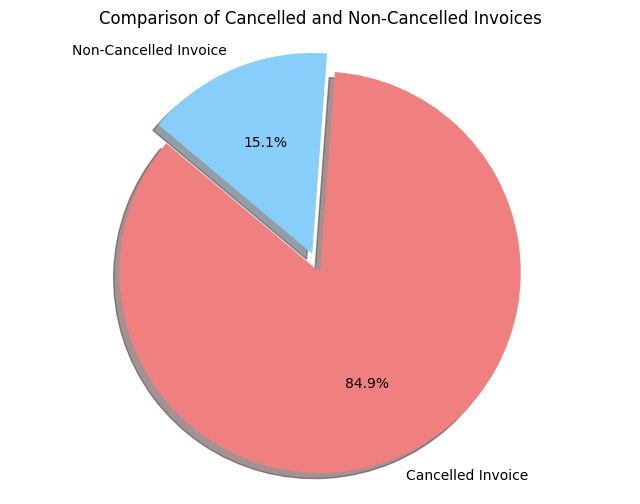

In [ ]:
# Plotting a pie chart to compare cancelled and non-cancelled invoices
labels = ['Cancelled Invoice', 'Non-Cancelled Invoice']
sizes = [Cancelled_Invoice, Non_Cancelled_Invoice]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice (Cancelled Invoice)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comparison of Cancelled and Non-Cancelled Invoices')
plt.show()

##### This pie chart clearly shows that Invoice Number that starts with C holds the most percentage in Cancellation at 84.9%.

#### 3.4 Cancellation based on Countries

In [ ]:
# Calculating cancellation based on countries
Cancelled_Countries = Quantity_with_negative_values.groupby('Country').size().sort_values(ascending=False)
print("Countries that have cancelled most are", Cancelled_Countries)

Countries that have cancelled most are Country
United Kingdom          20106
Germany                   921
EIRE                      512
France                    389
USA                       126
Australia                  98
Japan                      97
Channel Islands            95
Spain                      91
Italy                      66
Portugal                   58
Belgium                    54
Switzerland                52
Netherlands                47
United Arab Emirates       33
Sweden                     26
Poland                     23
Cyprus                     21
Denmark                    19
Norway                     18
Finland                    17
Malta                      17
Austria                    16
Korea                      10
Singapore                   7
Hong Kong                   6
Greece                      6
Czech Republic              5
Unspecified                 4
Nigeria                     2
Israel                      2
Bahrain                

#### 3.5 Sales Over Month

In [ ]:
# Calculating Total units sold per month in each year
Total_units_sold_on_months = df[df['Quantity'] > 0].groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month]).size()
Total_units_sold_on_months = Total_units_sold_on_months.rename_axis(['Year', 'Month']).reset_index(name='Count')
Total_units_sold_on_months_sorted = Total_units_sold_on_months.sort_values(by='Count', ascending=False)
Total_units_sold_on_months_sorted

,Year,Month,Count
23,2011,11,83498
11,2010,11,76596
12,2010,12,63813
22,2011,10,59396
10,2010,10,57939
21,2011,9,49323
0,2009,12,44123
9,2010,9,41186
3,2010,3,40477
6,2010,6,39050


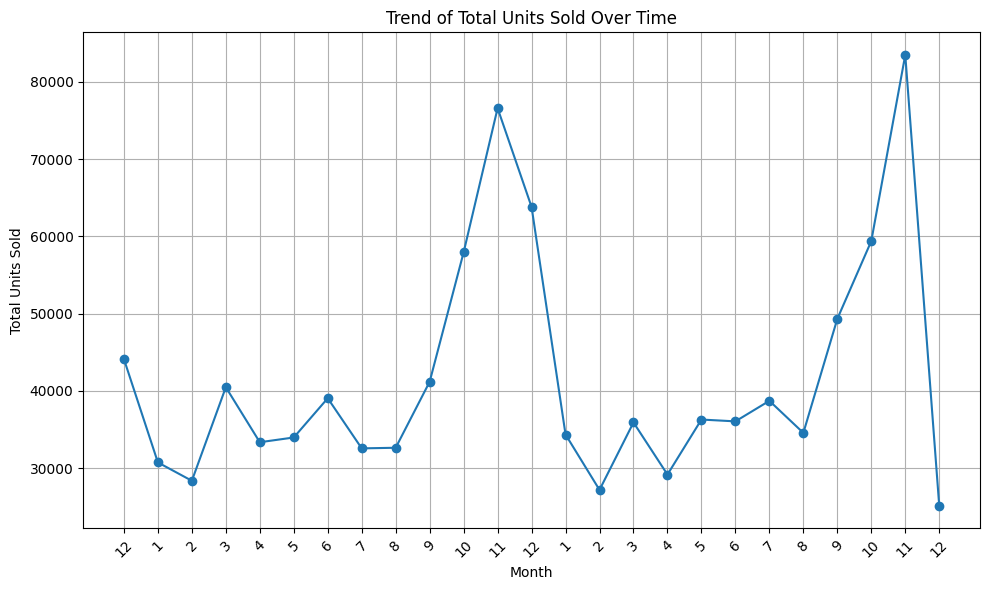

In [ ]:
# Plotting the trend of total units sold over time (months)
plt.figure(figsize=(10, 6))
plt.plot(Total_units_sold_on_months.index, Total_units_sold_on_months['Count'], marker='o', linestyle='-')
plt.title('Trend of Total Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.xticks(range(len(Total_units_sold_on_months)), Total_units_sold_on_months['Month'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##### This line chart shows the overall sales of the products on each month. Based on this graph we can understand that in both the year 2009-2010 & 2010-2011, September month saw the beginning of the hike of sales. And it got peaked at the month of November.

#### 3.6 Country wise Analysis

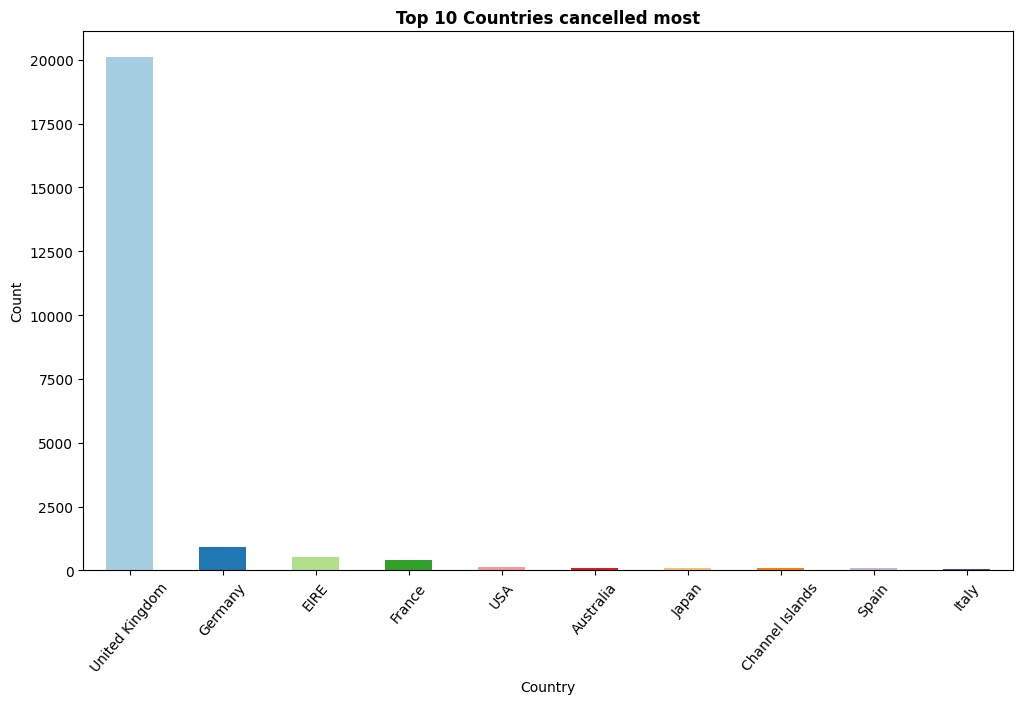

In [ ]:
# Calculating and plotting for visualizing from which country most guests arrive
plt.figure(figsize=(12,7))
Top10_countries = df[df['Quantity'] < 0]['Country'].value_counts().head(10)
Top10_countries.plot(kind='bar', color=sns.color_palette("Paired"))
plt.xticks(rotation=50)
plt.title('Top 10 Countries cancelled most', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

##### From this barchart we can see that United Kingdom has the most number of cancellation followed by Germany, EIRE and France.

##### Country wise Sales



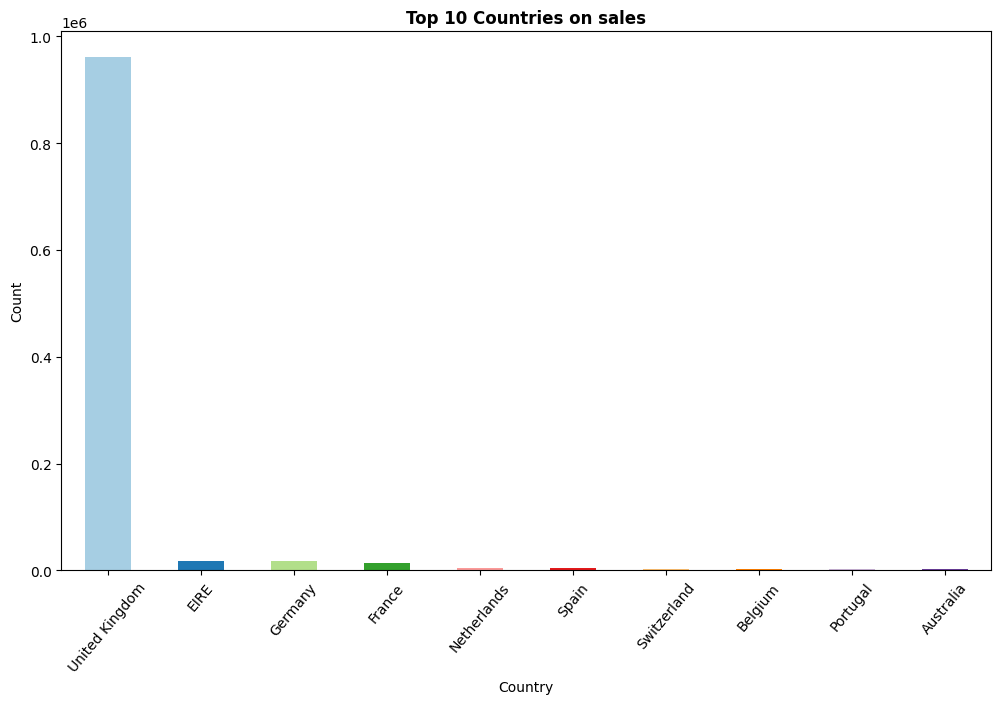

In [ ]:
# Calculating and plotting for visualizing countries which sold the most
plt.figure(figsize=(12,7))
Top10_countries = df[df['Quantity'] > 0]['Country'].value_counts().head(10)
Top10_countries.plot(kind='bar', color=sns.color_palette("Paired"))
plt.xticks(rotation=50)
plt.title('Top 10 Countries on sales', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

##### From this barchart we can see that United Kingdom has sold the most number of units followed by EIRE, Germany and France.

#### 3.6 Cancellation and Order Placement by Description

In [ ]:
# Calculating unique cancelled items based on quantity
unique_cancelled_items = df[df['Quantity'] < 0]['Description'].value_counts()
unique_cancelled_items.sort_values(ascending=False).head(10)

Description
Unknown                               2779
Manual                                 537
REGENCY CAKESTAND 3 TIER               347
POSTAGE                                229
BAKING SET 9 PIECE RETROSPOT           211
STRAWBERRY CERAMIC TRINKET BOX         184
Discount                               172
WHITE HANGING HEART T-LIGHT HOLDER     135
check                                  123
WHITE CHERRY LIGHTS                    121
Name: count, dtype: int64

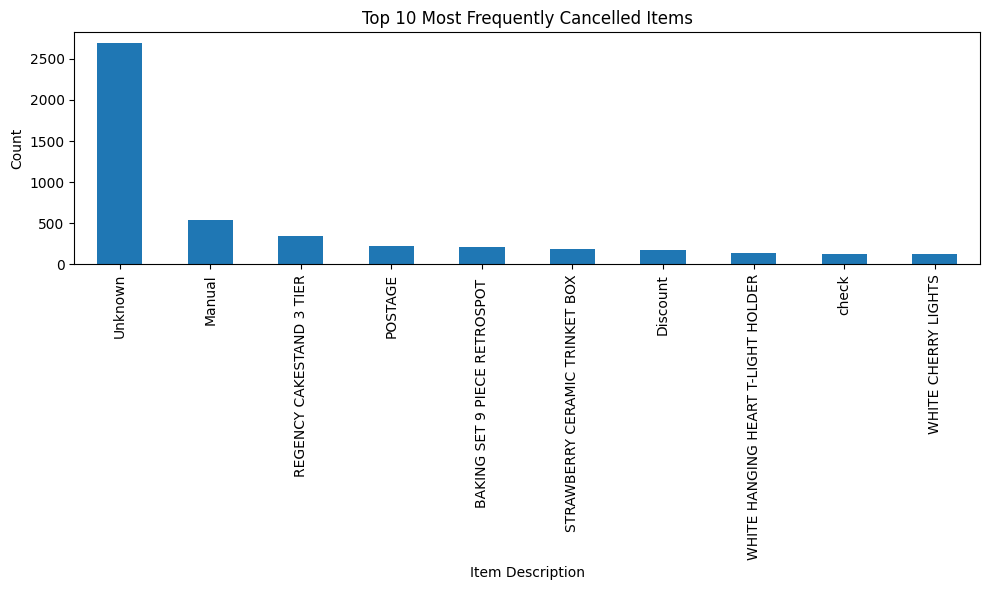

In [ ]:
# Selecting the top N most frequently cancelled items
top_10_cancelled_items = unique_cancelled_items.head(10)

# Plotting the distribution of top N items
plt.figure(figsize=(10, 6))
top_20_cancelled_items.plot(kind='bar')
plt.title('Top 10 Most Frequently Cancelled Items')
plt.xlabel('Item Description')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### From the above barchart we can see that Unknown item from the Description has the most number of cancellations followed by Manual, Regency Cakestand and Postage.

##### Top 10 Most Frequently Ordered Items

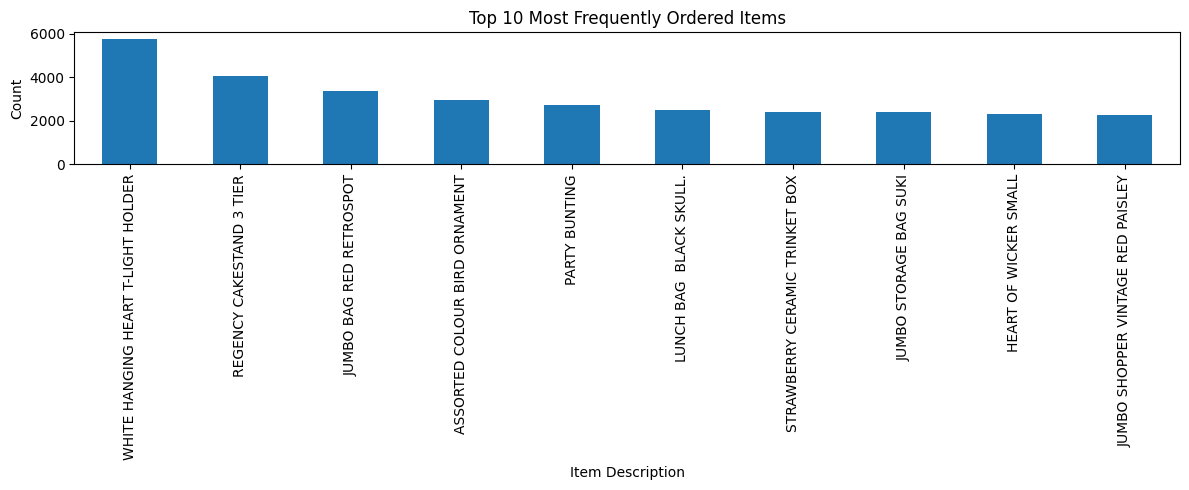

In [ ]:
# Selecting the top N most frequently ordered items
Top_10_Ordered_Items = Unique_Ordered_Items.head(10)

# Plotting the distribution of Top 20 items

plt.figure(figsize = (12,5))
Top_10_Ordered_Items.plot(kind='bar')
plt.title("Top 10 Most Frequently Ordered Items")
plt.xlabel("Item Description")
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### From the above chart, we can see that White Hanging T-Light holder is the most sold item followed by Regency cakestand, Jumbo bag red and Assorted color bird ornament.

#### 3.7 Cancellation Reasons

In [ ]:
# Calculating top return reasons
Top_10_Return_Reasons = df[~df['Invoice'].astype(str).str.startswith('C') & (df['Quantity'] < 0)]['Description'].value_counts().head(10)
Top_10_Return_Reasons

Description
Unknown                  2779
check                     123
damages                    84
damaged                    78
missing                    27
sold as set on dotcom      20
Damaged                    17
Damages                    12
thrown away                 9
smashed                     9
Name: count, dtype: int64

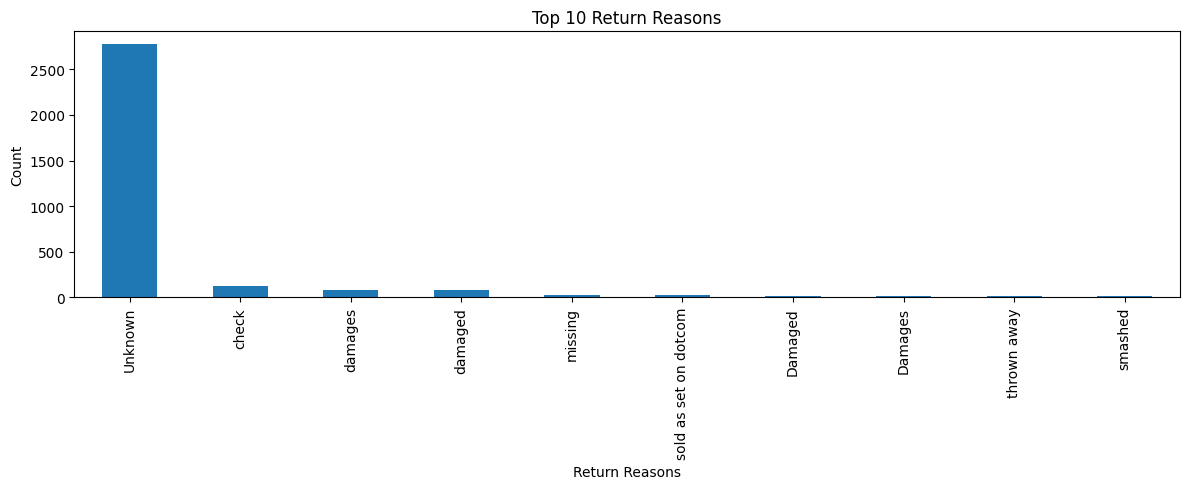

In [ ]:
# Plotting the distribution of Top 10 Cancelled Items
plt.figure(figsize=(12,5))
Top_10_Return_Reasons.plot(kind='bar')
plt.title('Top 10 Return Reasons')
plt.xlabel('Return Reasons')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

##### As seen from the above diagram, most cancellation are due to unknown reason. Most occurence of returns are due to damages, missing and set issues.

## ***4. Recommendations to the CEO of the company***

*   Consecutively for the two years Month from September to November sees the most number of sales. That means Decathlon needs to focus on improving the sales on the months that are selling the least. Decathlon needs to focus on improving sales on the month of January, February and April.
*   Most returns are due to some unknown reasons. It would be better if the customer care team gives more data on why the customer have returned the product. In that way, Decathlon can improve it's shipment process, thereby reducing the customer returns.
*   Countries like Switzerland, Belgium, Portugal and Australia has the least number of sales. Decathlon has to start working on improving the sales on these countries. It would be recommended that the research team in Decathlon has to research on what sports does these countries play the most and increase the selling of products of those sports.